## Sentiment Analysis of Headlines of Stock News of Sidus Space

This project analyzes the sentiments of headlines of stock news concerning Sidus space on finviz.com. 

In [101]:
#Importing Relevant Libraries
import pandas as pd
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [4]:
# Using API to scrape data from Finviz website
url = 'https://finviz.com/quote.ashx?t=SIDU'

req = Request(url = url, headers = {'user-agent': 'my-app'})
response = urlopen(req)
html = BeautifulSoup(response, 'html')

In [12]:
#Accessing the html data that was parsed by BeautifulSoup's html

news_table = html.find(id ="news-table")

news_table_dic = {}

ticker = 'SIDU'

news_table_dic[ticker] = news_table

In [54]:
#Sorting the html data into into list to be transformed into a dataframe
parsed_data = []
for ticker, news_table in news_table_dic.items():
    for row in news_table.findAll('tr'):
        title = row.a.text
        date_data = row.td.text.split(' ')
        
        if len(date_data) == 1:
            time = date_data[0]
        else:
            date = date_data[0]
            time = date_data[1]
        parsed_data.append([ticker, date,time, title])       
       

    
print(parsed_data)
            

[['SIDU', 'May-06-22', '12:30PM\xa0\xa0', 'Why Sidus Space Shares Are Skyrocketing Today'], ['SIDU', 'May-06-22', '09:00AM\xa0\xa0', 'Sidus Space Signs Memorandum of Understanding with Dhruva Space Expanding their Collaborative Partnership to Serve Global Customers with Space Technologies and Services'], ['SIDU', 'Apr-27-22', '09:00AM\xa0\xa0', 'Carol Craig, CEO of Sidus Space, receives a Distinguished Alumni Achievement Award from the University of Illinois Urbana-Champaign'], ['SIDU', 'Apr-22-22', '09:00AM\xa0\xa0', 'Sidus Space Announces Appointment of John Curry as Chief Mission Operations Officer'], ['SIDU', 'Apr-13-22', '09:00AM\xa0\xa0', 'Sidus Space Announces Appointment of Teresa Burchfield as Chief Financial Officer'], ['SIDU', 'Apr-05-22', '04:59PM\xa0\xa0', 'Sidus Space Stock Gains After Q4 Results, Clocks 95% Revenue Growth'], ['SIDU', 'Apr-05-22', '04:00PM\xa0\xa0', 'Sidus Space Inc. Announces 2021 Fourth Quarter and Year End Financials and Business Update'], ['SIDU', 'Ma

In [89]:
#Creating the dataframe out of the dictionary for analysis
df = pd.DataFrame(parsed_data, columns = ['ticker', 'date', 'time', 'title'])


In [90]:
df.head()

,ticker,date,time,title
0,SIDU,May-06-22,12:30PM,Why Sidus Space Shares Are Skyrocketing Today
1,SIDU,May-06-22,09:00AM,Sidus Space Signs Memorandum of Understanding ...
2,SIDU,Apr-27-22,09:00AM,"Carol Craig, CEO of Sidus Space, receives a Di..."
3,SIDU,Apr-22-22,09:00AM,Sidus Space Announces Appointment of John Curr...
4,SIDU,Apr-13-22,09:00AM,Sidus Space Announces Appointment of Teresa Bu...


In [91]:
# Creating Vader Object for analyzing the sentiments in the dataframe
vader = SentimentIntensityAnalyzer()
# Creating a vader function to apply sentiment analysis to the texts
function = lambda title: vader.polarity_scores(title)['compound']

In [92]:
df['compound'] = df['title'].apply(function)
df.head()

,ticker,date,time,title,compound
0,SIDU,May-06-22,12:30PM,Why Sidus Space Shares Are Skyrocketing Today,0.2960
1,SIDU,May-06-22,09:00AM,Sidus Space Signs Memorandum of Understanding ...,0.0000
2,SIDU,Apr-27-22,09:00AM,"Carol Craig, CEO of Sidus Space, receives a Di...",0.5423
3,SIDU,Apr-22-22,09:00AM,Sidus Space Announces Appointment of John Curr...,0.0000
4,SIDU,Apr-13-22,09:00AM,Sidus Space Announces Appointment of Teresa Bu...,0.0000


#### Visualizing the average sentiment over the years

In [98]:
# First we change the date to datetime format

df['date'] = pd.to_datetime(df.date).dt.date
# Calculate the average mean and group by 'ticker' and 'date'
mean_df = df.groupby(['date']).mean()
# Unstack the mean
mean_df.unstack()
# Get rid of the column name of 'compound' feature and transpose the dataframe
mean_df = mean_df.xs('compound', axis = 'columns').transpose()
mean_df.head()


date
2021-12-13    0.00000
2021-12-16    0.00000
2021-12-17    0.48245
2021-12-21    0.68080
2021-12-23    0.00000
Name: compound, dtype: float64

<AxesSubplot:title={'center':'Sentment Analysis of SIDU'}, xlabel='Date', ylabel='Sentiment Score'>

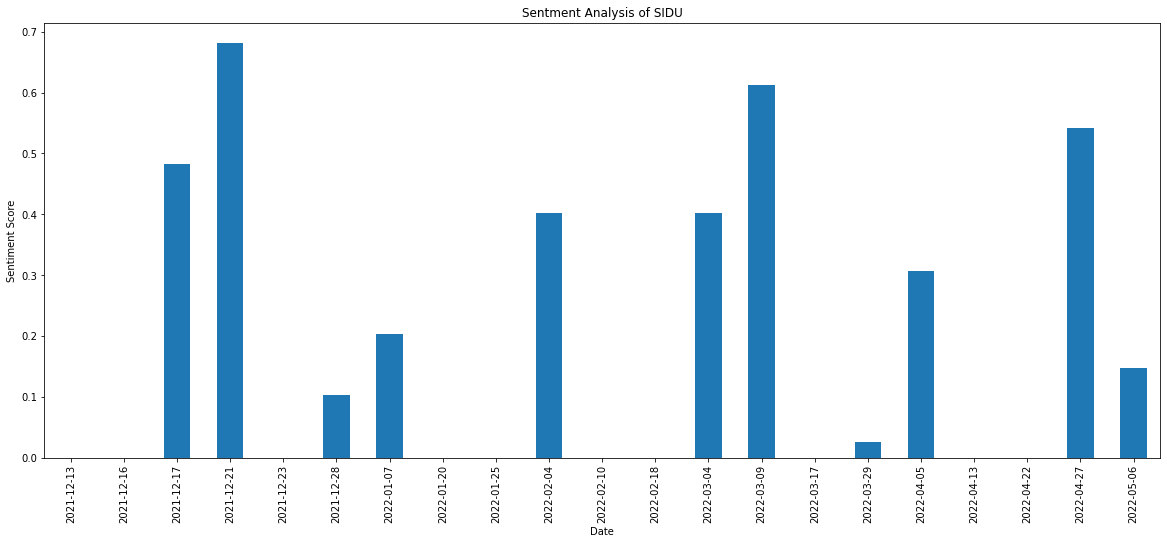

In [107]:
plt.figure(figsize = (20,8))
mean_df.plot(kind = 'bar', ylabel = 'Sentiment Score', xlabel = 'Date', title = 'Sentment Analysis of SIDU')

What could be observed is that the sentiment of headlines concerning Sidus Space on finviz.com generally has been positive. We do not observe any negative sentiment. However, there were instances of neutral sentiments in the headlines.